In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None) 
pd.set_option("display.max_rows", None)

In [2]:
model_var =  ['Year','vhRentaa', 'HousingCost_HighImpactHH','HousingCost_LowImpactHH', 'HousingCost_MediumImpactHH', \
              'HousingCost_Unknown / Not Declared', 'CrConditions_NChronic', 'CrConditions_Unknown / Not Declared', \
              'CrConditions_YChronic', 'HLimitations_NoLimited','HLimitations_NoSerLimitedG_limitado', \
              'HLimitations_SerLimited','HLimitations_Unknown / Not declared', 'MDClothes_No affordable', \
              'MDClothes_No, other reason','MDClothes_Unknown / Not Declared', 'MDClothes_Yes', 'MDShoes_No affordable', \
              'MDShoes_No, other reason', 'MDShoes_Unknown / Not Declared', 'MDShoes_Yes', 'MDFriends_No affordable',\
              'MDFriends_No, other reason', 'MDFriends_Unknown / Not Declared', 'MDFriends_Yes', 'MDLeisure_No affordable', \
              'MDLeisure_No, other reason', 'MDLeisure_Unknown / Not Declared', 'MDLeisure_Yes', 'MDSelf_No affordable',\
              'MDSelf_No, other reason', 'MDSelf_Unknown / Not Declared', 'MDSelf_Yes', 'MDInternet_No affordable',\
              'MDInternet_No, other reason', 'MDInternet_Unknown / Not Declared', 'MDInternet_Yes', 'LifeSatisfaction0',\
              'LifeSatisfaction1', 'LifeSatisfaction2', 'AREMonth','CHealth', 'vhPobreza_vhPobreza_No','vhPobreza_vhPobreza_Yes']


df = pd.read_csv('./Files/ECV_2004_2018.csv.gz', sep = ';', compression='gzip', usecols = model_var).dropna()
df_model = df[(df['Year'] == 2018) | (df['Year'] == 2013)]

df_model.head()

,Year,AREMonth,vhRentaa,CHealth,HousingCost_HighImpactHH,HousingCost_LowImpactHH,HousingCost_MediumImpactHH,HousingCost_Unknown / Not Declared,vhPobreza_vhPobreza_No,vhPobreza_vhPobreza_Yes,CrConditions_NChronic,CrConditions_Unknown / Not Declared,CrConditions_YChronic,HLimitations_NoLimited,HLimitations_NoSerLimitedG_limitado,HLimitations_SerLimited,HLimitations_Unknown / Not declared,MDClothes_No affordable,"MDClothes_No, other reason",MDClothes_Unknown / Not Declared,MDClothes_Yes,MDShoes_No affordable,"MDShoes_No, other reason",MDShoes_Unknown / Not Declared,MDShoes_Yes,MDFriends_No affordable,"MDFriends_No, other reason",MDFriends_Unknown / Not Declared,MDFriends_Yes,MDLeisure_No affordable,"MDLeisure_No, other reason",MDLeisure_Unknown / Not Declared,MDLeisure_Yes,MDSelf_No affordable,"MDSelf_No, other reason",MDSelf_Unknown / Not Declared,MDSelf_Yes,MDInternet_No affordable,"MDInternet_No, other reason",MDInternet_Unknown / Not Declared,MDInternet_Yes,LifeSatisfaction0,LifeSatisfaction1,LifeSatisfaction2
267835,2013,5.0,88450.00,1.0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,8.0,19.241614,8.000000
267836,2013,5.0,88450.00,2.0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,8.0,19.241614,8.000000
267837,2013,5.0,88450.00,2.0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,6.5,16.182607,6.728170
267838,2013,3.0,30558.69,1.0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,8.5,20.540864,8.540183
267839,2013,3.0,30558.69,2.0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,7.5,19.233254,7.996524


# Librerías

In [65]:
# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Métricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Selección de variables
import statsmodels.api as sm

# Hyperparameter tunning & Model selection
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randInt

# Validación 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Visualización
import seaborn as sns

# Variables 

In [5]:
# Variables
X = df_model[['vhRentaa','HousingCost_HighImpactHH','CrConditions_NChronic','HLimitations_NoLimited', 'MDInternet_Yes',
     'MDSelf_Yes', 'MDLeisure_Yes',  'MDFriends_Yes', 'MDShoes_Yes', 'MDClothes_Yes','CHealth','AREMonth']]
# Eliminar MD internet - HLimitations
# variable output con media aritmética
y1 = df_model['LifeSatisfaction0']
# variable output con predominio de variables de satisfacción con la vida
y2 = df_model['LifeSatisfaction2']

# Modelos

In [44]:
# Train - Test Split y1
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X,y1, test_size = 0.2, random_state = 42)
# Train - Test Split y2
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X,y2, test_size = 0.2, random_state = 42)

* ### Linear Regression

#### a) Variable y1

In [6]:
# Instancia
reg1 = LinearRegression()
# Fit del modelo
reg1.fit(X_train1, y_train1)
# Predicción de los valores en test
pred1=reg1.predict(X_test1)

#### b) Variable y2

In [7]:
# Instancia
reg2 = LinearRegression()
# Fit del modelo
reg2.fit(X_train2, y_train2)
# Predicción de los valores en test
pred2=reg2.predict(X_test2)

* ### Kneighbors

#### a) Variable y1

In [22]:
# Instancia
regk_1 = KNeighborsRegressor(n_neighbors=298)
# Fit del modelo
regk_1.fit(X_train1, y_train1)
# Predicción de los valores en test
predK1=regk_1.predict(X_test1)

#### a) Variable y2

In [23]:
# Instancia
regk_2 = KNeighborsRegressor(n_neighbors=299)
# Fit del modelo
regk_2.fit(X_train2, y_train2)
# Predicción de los valores en test
predk2=regk_2.predict(X_test2)

* ### Decision Tree

#### a) Variable y1

In [24]:
# Instancia
regd_1 = DecisionTreeRegressor(min_samples_split = 7,
                             max_depth = 4,
                             min_samples_leaf = 4)

# Fit del modelo
regd_1.fit(X_train1, y_train1)
# Predicción de los valores en test
predd1=regd_1.predict(X_test1)

#### a) Variable y2

In [25]:
# Instancia
regd_2 = DecisionTreeRegressor(min_samples_split = 7,
                             max_depth = 13,
                             min_samples_leaf = 4)

# Fit del modelo
regd_2.fit(X_train2, y_train2)
# Predicción de los valores en test
predd2=regd_2.predict(X_test2)

* ### Random Forest

#### a) Variable y1

In [26]:
# Instancia
rdfreg1 = RandomForestRegressor(n_estimators = 200, 
                               min_samples_split = 60, 
                               min_samples_leaf = 60, 
                               max_depth = 10)
# Fit del modelo
rdfreg1.fit(X_train1, y_train1)
# Predicción de los valores en test
predrdf1=rdfreg1.predict(X_test1)

#### a) Variable y2

In [27]:
# Instancia
rdfreg2 = RandomForestRegressor(n_estimators = 600, 
                               min_samples_split = 40, 
                               min_samples_leaf = 50, 
                               max_depth = 10)
# Fit del modelo
rdfreg2.fit(X_train2, y_train2)
# Predicción de los valores en test
predrdf2=rdfreg2.predict(X_test2)

# Resultados

In [28]:
# Regresión Lineal variable 1
print('Resultados Regresión Lineal con variable de Satisfacción 0:')
print('MAPE: ' + str(np.mean(np.abs(y_test1-pred1))))
print('MAE: ' + str(mean_absolute_error(y_test1,pred1)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(reg1.predict((X_test1)),y_test1))))
print('correlation coefficient: ' + str(np.corrcoef(reg1.predict(X_test1), y_test1)[0][1]))
print('R2_score: ' + str(r2_score(y_test1,pred1,multioutput='variance_weighted')))
print('-------------')
# Regresión Lineal variable 2 
print('Resultados Regresión Lineal con variable de Satisfacción 2:')
print('MAPE: ' + str(np.mean(np.abs(y_test2-pred2))))
print('MAE: ' + str(mean_absolute_error(y_test2,pred2)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(reg2.predict((X_test2)),y_test2))))
print('correlation coefficient: ' + str(np.corrcoef(reg2.predict(X_test2), y_test2)[0][1]))
print('R2_score: ' + str(r2_score(y_test2,pred2,multioutput='variance_weighted')))
print('----------------------------')
print('----------------------------')
# Kneighbors variable 1
print('Resultados Kneighbors con variable de Satisfacción 0:')
print('MAPE: ' + str(np.mean(np.abs(y_test1-predK1))))
print('MAE: ' + str(mean_absolute_error(y_test1,predK1)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(regk_1.predict((X_test1)),y_test1))))
print('-------------')
# Kneighbors variable 2
print('Resultados Kneighbors con variable de Satisfacción 1:')
print('MAPE: ' + str(np.mean(np.abs(y_test2-predk2))))
print('MAE: ' + str(mean_absolute_error(y_test2,predk2)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(regk_2.predict((X_test2)),y_test2))))
print('----------------------------')
print('----------------------------')
# Decision tree variable 1
print('Resultados Decision Tree con variable de Satisfacción 0:')
print('MAPE: ' + str(np.mean(np.abs(y_test1-predd1))))
print('MAE: ' + str(mean_absolute_error(y_test1,predd1)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(regd_1.predict((X_test1)),y_test1))))
print('-------------')
# Decision tree variable 2
print('Resultados Decision Tree con variable de Satisfacción 1:')
print('MAPE: ' + str(np.mean(np.abs(y_test2-predd2))))
print('MAE: ' + str(mean_absolute_error(y_test2,predd2)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(regd_2.predict((X_test2)),y_test2))))
# Random Forest variable 1
print('----------------------------')
print('----------------------------')
print('Resultados Random Forest con variable de Satisfacción 0:')
print('MAPE: ' + str(np.mean(np.abs(y_test1-predrdf1))))
print('MAE: ' + str(mean_absolute_error(y_test1,predrdf1)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(rdfreg1.predict((X_test1)),y_test1))))
print('-------------')
# Random Forest variable 1
print('Resultados Random Forest con variable de Satisfacción 1:')
print('MAPE: ' + str(np.mean(np.abs(y_test2-predrdf2))))
print('MAE: ' + str(mean_absolute_error(y_test2,predrdf2)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(rdfreg2.predict((X_test2)),y_test2))))

Resultados Regresión Lineal con variable de Satisfacción 0:
MAPE: 0.9419839241990273
MAE: 0.9419839241990325
RMSE: 1.211657300319262
correlation coefficient: 0.5519219532659716
R2_score: 0.3045440832157986
-------------
Resultados Regresión Lineal con variable de Satisfacción 2:
MAPE: 0.9383386028231032
MAE: 0.9383386028231001
RMSE: 1.2145500714481425
correlation coefficient: 0.5859384642757269
R2_score: 0.3432371696608169
----------------------------
----------------------------
Resultados Kneighbors con variable de Satisfacción 0:
MAPE: 1.0929772281110102
MAE: 1.0929772281110086
RMSE: 1.4075352942393013
-------------
Resultados Kneighbors con variable de Satisfacción 1:
MAPE: 1.1088464227397656
MAE: 1.1088464227397672
RMSE: 1.438517619661969
----------------------------
----------------------------
Resultados Decision Tree con variable de Satisfacción 0:
MAPE: 0.9657221308609686
MAE: 0.9657221308609719
RMSE: 1.2408128615844007
-------------
Resultados Decision Tree con variable de Sa

# Feature Selection 

In [31]:
# Pendiente

Feature: 0, Score: 0.00000
Feature: 1, Score: -0.10954
Feature: 2, Score: -0.19704
Feature: 3, Score: 0.00883
Feature: 4, Score: -0.12417
Feature: 5, Score: 0.25589
Feature: 6, Score: 0.25476
Feature: 7, Score: 0.31672
Feature: 8, Score: 0.27460
Feature: 9, Score: 0.45283
Feature: 10, Score: -0.39028
Feature: 11, Score: 0.31099


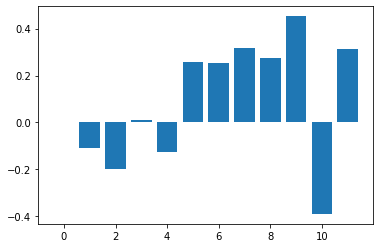

In [94]:
# valor de los coeficientes
importance1 = reg1.coef_

# resumen de la importancia
for i,v in enumerate(importance1):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# gráfico de la importancia
plt.bar([x for x in range(len(importance1))], importance1)
plt.show()

In [99]:
import statsmodels.api as sm

In [100]:
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y1,X_1).fit()
model.pvalues

const                        0.000000e+00
vhRentaa                     3.631958e-07
HousingCost_HighImpactHH     2.741821e-19
CrConditions_NChronic        7.563613e-34
HLimitations_NoLimited       9.232865e-01
MDInternet_Yes               1.833914e-15
MDSelf_Yes                   1.208383e-69
MDLeisure_Yes                1.184590e-67
MDFriends_Yes                7.313237e-72
MDShoes_Yes                  8.700853e-12
MDClothes_Yes               1.935084e-106
CHealth                      0.000000e+00
AREMonth                     0.000000e+00
dtype: float64

In [103]:
model.pvalues

const                        0.000000e+00
vhRentaa                     3.631958e-07
HousingCost_HighImpactHH     2.741821e-19
CrConditions_NChronic        7.563613e-34
HLimitations_NoLimited       9.232865e-01
MDInternet_Yes               1.833914e-15
MDSelf_Yes                   1.208383e-69
MDLeisure_Yes                1.184590e-67
MDFriends_Yes                7.313237e-72
MDShoes_Yes                  8.700853e-12
MDClothes_Yes               1.935084e-106
CHealth                      0.000000e+00
AREMonth                     0.000000e+00
dtype: float64

# Hyperparameter tuning

##### Kneighbors y1

In [15]:
%%time
regk1 = GridSearchCV(KNeighborsRegressor(),
                  param_grid={"n_neighbors":np.arange(4,300)},
                  cv=5,
                  scoring="neg_mean_absolute_error")


regk1.fit(X,y1)

print(regk1.best_params_)

{'n_neighbors': 298}
CPU times: user 5min 45s, sys: 234 ms, total: 5min 45s
Wall time: 5min 46s


##### Kneighbors y1

In [16]:
%%time
regk2 = GridSearchCV(KNeighborsRegressor(),
                  param_grid={"n_neighbors":np.arange(4,300)},
                  cv=5,
                  scoring="neg_mean_absolute_error")


regk2.fit(X,y2)

print(regk2.best_params_)

{'n_neighbors': 299}
CPU times: user 6min 1s, sys: 93.8 ms, total: 6min 1s
Wall time: 6min 3s


##### Decision Tree y1

In [17]:
%%time

regd1 = GridSearchCV(DecisionTreeRegressor(),
                  param_grid={"min_samples_split":np.arange(4,15),
                              "max_depth":np.arange(4,15),
                             'min_samples_leaf':np.arange(4,15)},
                  cv=5,
                  scoring="neg_mean_absolute_error")


regd1.fit(X,y1)

print(regd1.best_params_)

{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 4}
CPU times: user 6min 23s, sys: 141 ms, total: 6min 23s
Wall time: 6min 24s


##### Decision Tree y2

In [18]:
%%time

regd2 = GridSearchCV(DecisionTreeRegressor(),
                  param_grid={"min_samples_split":np.arange(4,15),
                              "max_depth":np.arange(4,15),
                             'min_samples_leaf':np.arange(4,15)},
                  cv=5,
                  scoring="neg_mean_absolute_error")


regd2.fit(X,y2)

print(regd2.best_params_)

{'max_depth': 7, 'min_samples_leaf': 12, 'min_samples_split': 4}
CPU times: user 6min 16s, sys: 188 ms, total: 6min 16s
Wall time: 6min 17s


##### Random Forest y1

In [19]:
# Hiperparametros
# n_estimators - number of intances - Number of trees
n_estimators = [50,100,200,400,600]

# max_depth: Maximun number of levels in the tree
max_depth = [10,20,30,40,50]

# min_sample_split: Min number of samples to split a node
min_samples_split = [20,30,40,50,60]

# min_sample_leaf: Min number of samples at each leaf node
min_samples_leaf = [20,30,40,50,60]

# min_sample_leaf: Min number of samples at each leaf node
grid_param = {'n_estimators':n_estimators, 'max_depth':max_depth, 'min_samples_split': min_samples_split,
              'min_samples_leaf':min_samples_leaf}

##### Modelo con variable de Satisfacción con la vida 0

In [20]:
%%time

rscv1 = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = grid_param, 
                        n_iter = 100, cv = 5, verbose = 2, random_state = 33, 
                        n_jobs = -1)

rscv1.fit(X,y1)

print(rscv1.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 29.4min finished


{'n_estimators': 200, 'min_samples_split': 60, 'min_samples_leaf': 60, 'max_depth': 10}
CPU times: user 12 s, sys: 1.41 s, total: 13.4 s
Wall time: 29min 33s


##### Modelo con variable de Satisfacción con la vida 2

In [21]:
%%time

rscv2 = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = grid_param, 
                        n_iter = 100, cv = 5, verbose = 2, random_state = 33, 
                        n_jobs = -1)

rscv2.fit(X,y2)

print(rscv2.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 29.1min finished


{'n_estimators': 600, 'min_samples_split': 40, 'min_samples_leaf': 50, 'max_depth': 10}
CPU times: user 30.4 s, sys: 1.11 s, total: 31.5 s
Wall time: 29min 32s


# Feature Selection

* Backward Elimination with OLS

In [49]:
#Backward Elimination y1
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y1,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

#Backward Elimination y2
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y2,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['vhRentaa', 'HousingCost_HighImpactHH', 'CrConditions_NChronic', 'MDInternet_Yes', 'MDSelf_Yes', 'MDLeisure_Yes', 'MDFriends_Yes', 'MDShoes_Yes', 'MDClothes_Yes', 'CHealth', 'AREMonth']
['vhRentaa', 'HousingCost_HighImpactHH', 'CrConditions_NChronic', 'MDSelf_Yes', 'MDLeisure_Yes', 'MDFriends_Yes', 'MDShoes_Yes', 'MDClothes_Yes', 'CHealth', 'AREMonth']


In [46]:
# Variables X para y 1
X_1BD = ['vhRentaa', 'HousingCost_HighImpactHH', 'CrConditions_NChronic', 
         'MDInternet_Yes', 'MDSelf_Yes', 'MDLeisure_Yes', 'MDFriends_Yes', 
         'MDShoes_Yes', 'MDClothes_Yes', 'CHealth', 'AREMonth']
# Variables X para y 2
X_2BD = ['vhRentaa', 'HousingCost_HighImpactHH', 'CrConditions_NChronic', 
         'MDSelf_Yes', 'MDLeisure_Yes', 'MDFriends_Yes', 'MDShoes_Yes', 
         'MDClothes_Yes', 'CHealth', 'AREMonth']
# Train - Test Split y1
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X,y1, test_size = 0.2, random_state = 42)
# Train - Test Split y2
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X,y2, test_size = 0.2, random_state = 42)
# Modelo y 1
reg_1BE = LinearRegression()
# Fit del modelo
reg_1BE.fit(X_train1, y_train1)
# Predicción de los valores en test
pred_1BE= reg_1BE.predict(X_test1)

# Modelo y 2
reg_2BE = LinearRegression()
# Fit del modelo
reg_2BE.fit(X_train2, y_train2)
# Predicción de los valores en test
pred_2BE= reg_2BE.predict(X_test2)

In [48]:
# Regresión Lineal variable 1
print('Resultados Regresión Lineal con variable de Satisfacción 0:')
print('MAPE: ' + str(np.mean(np.abs(y_test1-pred_1BE))))
print('MAE: ' + str(mean_absolute_error(y_test1,pred_1BE)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(reg_1BE.predict((X_test1)),y_test1))))
print('correlation coefficient: ' + str(np.corrcoef(reg_1BE.predict(X_test1), y_test1)[0][1]))
print('R2_score: ' + str(r2_score(y_test1,pred_1BE,multioutput='variance_weighted')))
print('-------------')
# Regresión Lineal variable 2 
print('Resultados Regresión Lineal con variable de Satisfacción 2:')
print('MAPE: ' + str(np.mean(np.abs(y_test2-pred_2BE))))
print('MAE: ' + str(mean_absolute_error(y_test2,pred_2BE)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(reg_2BE.predict((X_test2)),y_test2))))
print('correlation coefficient: ' + str(np.corrcoef(reg_2BE.predict(X_test2), y_test2)[0][1]))
print('R2_score: ' + str(r2_score(y_test2,pred_2BE,multioutput='variance_weighted')))
print('----------------------------')
print('----------------------------')

Resultados Regresión Lineal con variable de Satisfacción 0:
MAPE: 0.9419839241990273
MAE: 0.9419839241990325
RMSE: 1.211657300319262
correlation coefficient: 0.5519219532659716
R2_score: 0.3045440832157986
-------------
Resultados Regresión Lineal con variable de Satisfacción 2:
MAPE: 0.9383386028231032
MAE: 0.9383386028231001
RMSE: 1.2145500714481425
correlation coefficient: 0.5859384642757269
R2_score: 0.3432371696608169
----------------------------
----------------------------
